## What is Cohort Analysis?

Cohort analysis is a type of analysis that follows a group of customers (cohorts) over time to understand their behavior, based on a characteristic that identifies them during a period of time. Periods could be a day, week, month, or even a year. Cohort analysis takes into account time series data over the lifespan of a user to predict and analyze their future consumption patterns. 

Cohorts are commonly created in accordance with acquisition date shared by a group of users. An acquisition cohort refers to a group of users who were newly acquired (e.g account creation, first purchase) by a business. On the other hand, users are assigned to behavioural cohorts when they perform a specific action during a time frame.

By analysing each cohort in isolation, behavioural differences between groups can be identified. These observations can then be used to inform marketing and product development decisions.

Cohort analyses are important because churn is one of the main problems faced by companies nowadays, and every information that can lead to less churning is a valuable business information.

Specifically, cohort analysis can be used to:

**Measure Customer Lifetime Value (CLV)**

Cohort analysis can be used to identify patterns in retention & monetary value of different user groups. By identifying valuable groups, strategies can be developed to replicate their characteristics among other groups.

**Evaluate Marketing Campaigns**

Monitoring how groups respond to different campaigns can help reveal the true effectiveness of marketing. For example, a big discount promotion may drive high levels of acquisition, but these users may have little interest in full price goods — making them likely to churn. Over time, it may be observed that CLV is higher for campaigns that drove lower levels of acquisition.

**Improve Product Development**

Assigning users to cohorts, based on the actions they have taken within a product, can provide insights into the features that promote increases in user retention and engagement.

**e-commerce**

Customers who have started using the service just two or three days ago or had just made their first purchase can be grouped into one group or cohort whereas people who have been on the website for 1 or 2 years may be grouped into another cohort and their purchase activity over the year can be used to predict how many times they will visit the website in the future or how many times they will actually click on a product and purchase it. This can be used to personalize their own home feed so that the click-through rate increases and their retention for that particular website don’t subside.

**Websites**

Cohort analysis can be used to predict viewer retention when a new person logs in for the first time vs a person who has been on the platform for a long time. To keep the new user on the platform, their home feed will be personalized with the most popular videos that have a huge amount of views, clickbait thumbnails, or videos with popular search terms based on that particular user’s location data whereas a long-time user will mostly receive video updates from their subscriptions and their most watched channels.

## Steps for Cohort Analysis

There are 05 main steps to performing cohort analysis. They are as follows:

1. Determining the main objective of the cohort analysis: First and foremost, we need to determine the main intent of performing the analysis, such as to analyze why people on YouTube don’t watch videos after the 6-minute mark. This sets the ultimate goal of the analysis and uses the huge pool of information for practical issues. This helps in pinpointing the root issue or cause and companies can then work towards improved business practices to provide a better user experience.

2. Defining the metrics to respond to the question: The next step would be to identify what defines the problem. In simpler words, from the above example, we need to analyze when a viewer leaves a video or at what minute before moving on to something else, his/her watch time, and click-through rates on YouTube.

3. Identify the particular groups or cohorts that will be relevant: To analyze users we need to pick out a group of viewers who display common behavioral patterns. In order to do this we need to analyze data from different user inputs and identify relevant similarities and differences between them and then separate it into specified cohorts.

4. Performing the Cohort Analysis: Now we will use data visualization techniques to perform the cohort analysis based on the objective of the problem. This can be done using many programming languages out of which the preferred languages are python and R. Cohort analysis in python can be done using libraries such as NumPy and seaborn. Heat maps are usually used to display user retention and visualize data in a tabular form.

5. Testing the Results: Last but not the least, the results need to be checked and tested in order to make sure that they can actually reduce company losses and optimize business practices. We will obtain retention rates from the analysis and a heatmap(or any other suitable graph) of user retention and retention rate will help us analyze and improve experiences for the users.

## Environment Setting

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/nickmancol/python-cohorts/main/data/scanner_data.csv')

In [3]:
# show dataframe subset
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [4]:
# drop unnamed column
df = df.drop(['Unnamed: 0'], axis = 1)
# convert column to datetime
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [5]:
# get descriptive stats
df.describe(include='number')

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000
mean,12386.450367,32389.604187,1.485311,11.981524
std,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,0.010000,0.020000
25%,7349.000000,16134.000000,1.000000,4.230000
50%,13496.000000,32620.000000,1.000000,6.920000
75%,17306.000000,48548.000000,1.000000,12.330000
max,22625.000000,64682.000000,400.000000,707.730000


In [6]:
# count duplicates
df.duplicated(["Date","Customer_ID"]).sum()

np.int64(68979)

In [7]:
print(f'The dataset has {df.size:,.2f} rows.')

The dataset has 921,942.00 rows.


In [8]:
# Group by date and customer and sum quantity and sales selecting last items
df = pd.DataFrame(df.groupby(["Date","Customer_ID"]).agg({'Transaction_ID':'max'
                                                          ,'SKU_Category':'max'
                                                          ,'SKU':'max'
                                                          ,'Quantity':'sum'
                                                          ,'Sales_Amount':'sum'})
                 ).reset_index()

In [9]:
print(f'The dataset now has {df.size:,.2f} rows.')

The dataset now has 439,089.00 rows.


## Data Preparation for Cohort Analysis

To run a cohort analysis, we’ll need to: 

* Split the data into groups that can be analyzed on the basis of time
* Assign a cohort index for each transaction
* Create two new columns by applying a lambda function to the date column in order to: 

    * Create the tx_month column 
    * Transform tx_month to get the minimum value of tx_month per customer 
    * Assign tx_month per customer to the acq_month column

In [10]:
# create transaction month column with day 1
df['tx_month'] = df['Date'].apply(lambda x: dt.date(x.year, x.month,1))
# create acquisition column based on minimum transaction month column by customer
df['acq_month'] = df.groupby('Customer_ID')['tx_month'].transform('min')
# select rows where transaction dates differ from acquisition date
df.loc[df['tx_month'] != df['acq_month']].head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,tx_month,acq_month
4701,2016-02-01,50,5004,W41,ZWFSY,5.0,2.86,2016-02-01,2016-01-01
4702,2016-02-01,91,4976,2ML,68BRQ,1.0,5.79,2016-02-01,2016-01-01
4709,2016-02-01,366,4852,J4R,VGIW5,2.0,15.64,2016-02-01,2016-01-01
4720,2016-02-01,889,4900,TEU,A233P,2.0,11.87,2016-02-01,2016-01-01
4723,2016-02-01,1115,4933,YMJ,JNWFX,1.0,7.43,2016-02-01,2016-01-01


In [11]:
# Claculate the number of months elapsed between transaction and acquisition
def diff_month(x):
    d1 = x['tx_month']
    d2 = x["acq_month"]
    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1

In [12]:
# Store the number of months between transaction and acquisition month
df['cohort_idx'] = df.apply(lambda x: diff_month(x), axis=1)

In [13]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,tx_month,acq_month,cohort_idx
0,2016-01-02,3,90,TW8,Y1M2E,4.0,10.92,2016-01-01,2016-01-01,1
1,2016-01-02,178,84,R6E,HO1M5,2.0,58.99,2016-01-01,2016-01-01,1
2,2016-01-02,195,107,LGI,VY2UB,2.0,13.10,2016-01-01,2016-01-01,1
3,2016-01-02,343,134,XG4,ZSVWE,1.0,6.75,2016-01-01,2016-01-01,1
4,2016-01-02,399,136,P42,XJLWY,2.0,10.43,2016-01-01,2016-01-01,1


In [14]:
# create cohort matrix by counting unique customers
def get_cohort_matrix(data, var='Customer_ID', fun=pd.Series.nunique):
    # group by acquisition and cohort_id
    cd = data.groupby(['acq_month', 'cohort_idx'])[var].apply(fun).reset_index()
    # create pivot table with acquisition, cohort_id and counting customers
    cc = cd.pivot_table(index = 'acq_month',
                        columns = 'cohort_idx',
                        values = var)
    # calculate retention rate
    # select first column of pivot table, i.e., first cohort_id
    cs = cc.iloc[:,0]
    # divide all values in the cohort matrix by the corresponding initial cohort_id size
    retention = cc.divide(cs, axis = 0)
    # create percentage and round decimals
    retention = retention.round(3)
    # return the matrix and retention rate for each cohort_id
    return cc, retention

In [15]:
cc, retention = get_cohort_matrix(df)

In [16]:
# format index datetie
retention.index = pd.to_datetime(retention.index).strftime('%b %Y')

The rows of the pivot table consist of the beginning of user activity or the month from which the user has started visiting the ecommerce website or has made the first purchase. The columns represent the user’s retention rate or how long has the user been coming back to purchase since his first time.

In [17]:
retention

cohort_idx,1,2,3,4,5,6,7,8,9,10,11,12
acq_month,,,,,,,,,,,,
Jan 2016,1.0,0.385,0.302,0.176,0.078,0.058,0.045,0.040,0.027,0.016,0.012,0.012
Feb 2016,1.0,0.215,0.131,0.066,0.043,0.031,0.031,0.026,0.010,0.008,0.006,NaN
Mar 2016,1.0,0.282,0.246,0.227,0.201,0.197,0.201,0.194,0.194,0.201,NaN,NaN
Apr 2016,1.0,0.288,0.250,0.219,0.224,0.235,0.224,0.224,0.230,NaN,NaN,NaN
May 2016,1.0,0.238,0.213,0.192,0.216,0.210,0.198,0.199,NaN,NaN,NaN,NaN
Jun 2016,1.0,0.177,0.175,0.178,0.177,0.177,0.191,NaN,NaN,NaN,NaN,NaN
Jul 2016,1.0,0.142,0.151,0.156,0.150,0.166,NaN,NaN,NaN,NaN,NaN,NaN
Aug 2016,1.0,0.154,0.130,0.135,0.119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sep 2016,1.0,0.190,0.162,0.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


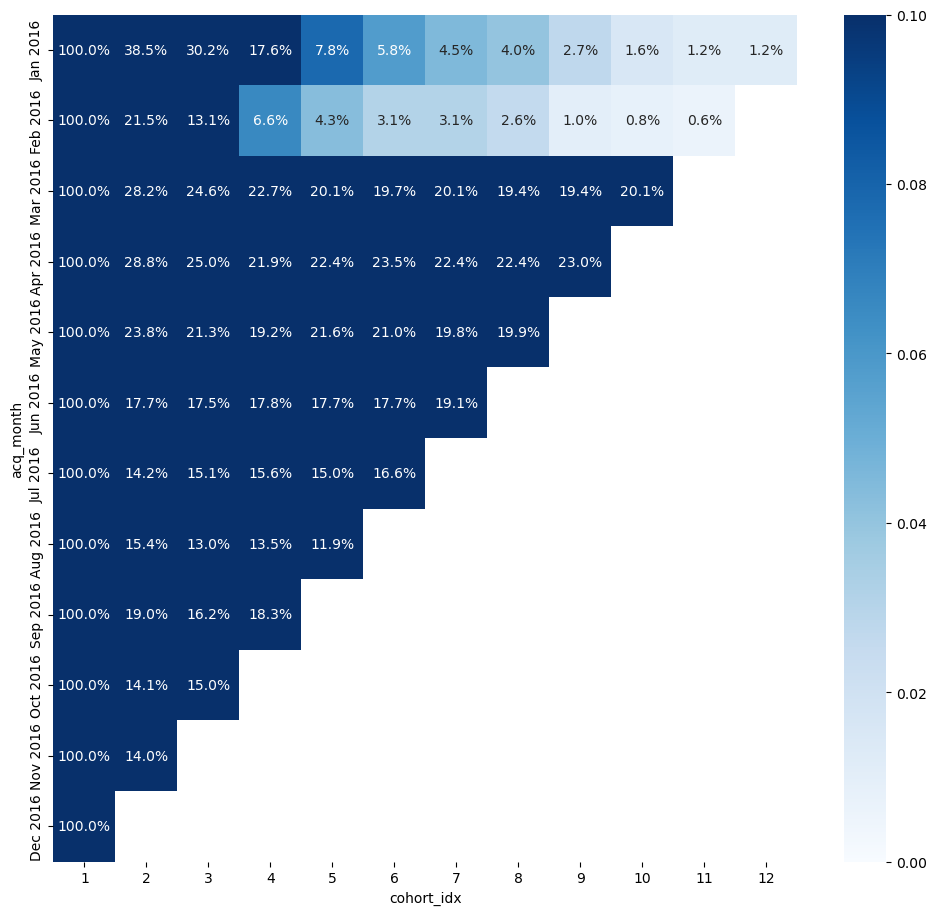

In [18]:
#creation of heatmap and visualization
plt.figure(figsize=(12, 11))
sns.heatmap(data=retention,
            annot=True,
            fmt='0.1%',
            vmin=0.0,
            vmax=0.1,
            cmap='Blues')
plt.show()

## Segmented by Quantity

In [19]:
cc_q, ret_q = get_cohort_matrix(df, var='Quantity', fun=pd.Series.mean)
cc_q

cohort_idx,1,2,3,4,5,6,7,8,9,10,11,12
acq_month,,,,,,,,,,,,
2016-01-01,3.164760,3.345814,3.134125,3.043550,3.509021,3.644632,3.640000,2.857143,3.851575,2.989362,6.000000,2.494737
2016-02-01,2.986317,2.720292,3.063029,2.815029,3.089138,3.820513,2.364706,2.484375,6.640000,1.650000,1.823529,NaN
2016-03-01,2.919831,3.354397,3.753517,3.625239,3.923795,3.637677,3.749833,3.790764,3.421667,3.419633,NaN,NaN
2016-04-01,2.811928,3.308361,3.530516,2.856732,3.268678,3.268426,3.589691,3.126519,3.459594,NaN,NaN,NaN
2016-05-01,2.710384,3.160431,3.235338,3.091508,3.111241,3.214499,3.625133,3.346479,NaN,NaN,NaN,NaN
2016-06-01,2.712752,3.067361,3.405827,2.577969,3.165492,2.727486,3.466247,NaN,NaN,NaN,NaN,NaN
2016-07-01,2.730425,2.467593,2.674009,3.529661,2.740444,3.260802,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,2.607402,2.758663,2.699218,3.588889,2.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,2.918562,3.190777,3.692153,3.604326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


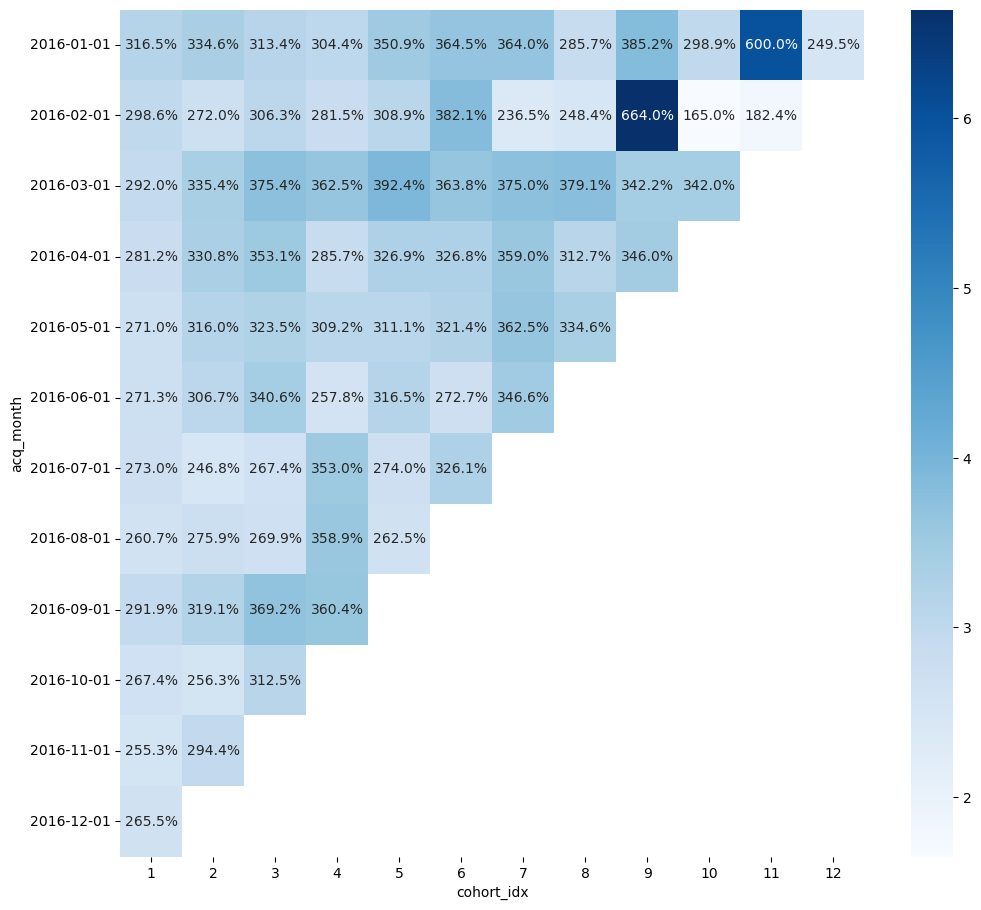

In [20]:
#creation of heatmap and visualization
plt.figure(figsize=(12,11))
sns.heatmap(cc_q, annot=True,cmap='Blues', fmt='.1%')
plt.show()

## Segmented by Sales Amount

In [21]:
cc_sa, ret_sa = get_cohort_matrix(df, var='Sales_Amount', fun=pd.Series.median)
cc_sa

cohort_idx,1,2,3,4,5,6,7,8,9,10,11,12
acq_month,,,,,,,,,,,,
2016-01-01,11.460,13.290,12.67,12.470,14.685,15.730,13.70,12.05,12.110,11.165,11.78,13.75
2016-02-01,12.075,12.360,12.08,11.190,14.265,14.705,11.05,9.91,12.160,9.860,11.94,NaN
2016-03-01,12.000,13.650,13.02,13.785,14.325,13.140,14.41,16.25,13.845,14.870,NaN,NaN
2016-04-01,11.860,12.620,13.44,12.630,13.210,13.430,13.44,13.80,14.290,NaN,NaN,NaN
2016-05-01,11.590,13.535,12.61,13.100,12.190,12.160,13.41,13.12,NaN,NaN,NaN,NaN
2016-06-01,12.330,12.690,11.93,11.500,11.705,12.645,13.50,NaN,NaN,NaN,NaN,NaN
2016-07-01,12.030,11.570,12.08,12.715,13.750,13.590,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,11.880,10.020,11.38,12.205,11.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,11.930,10.740,12.43,13.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


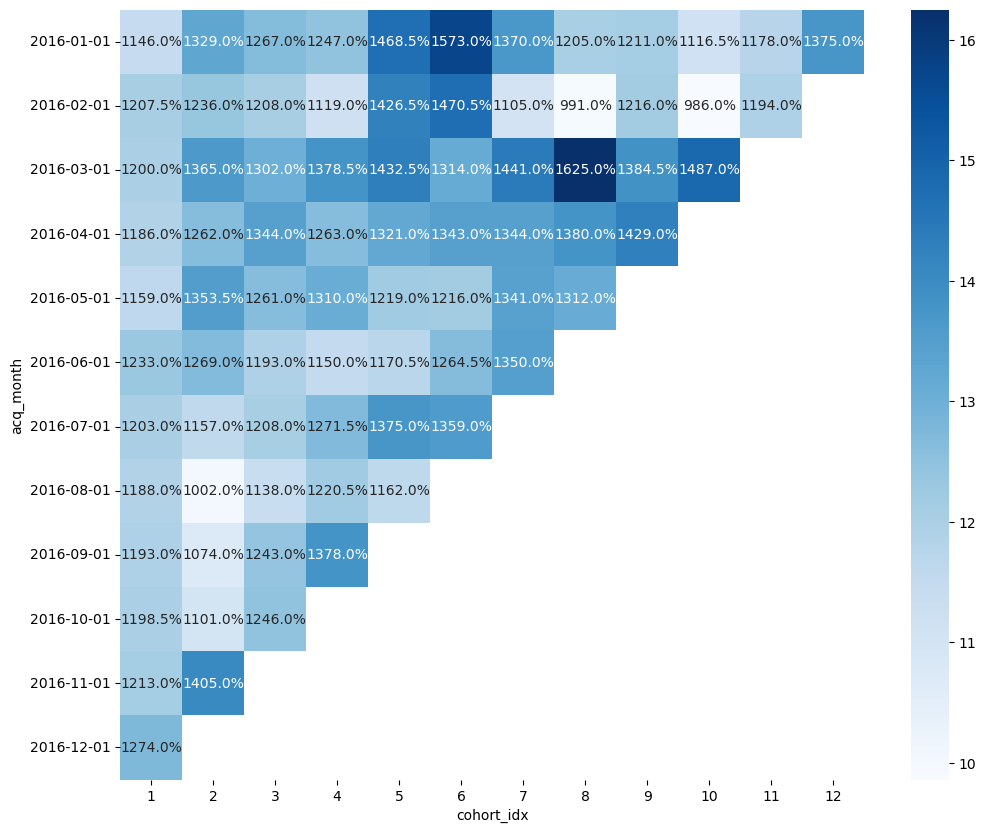

In [22]:
#creation of heatmap and visualization
plt.figure(figsize=(12,10))
sns.heatmap(cc_sa, annot=True,cmap='Blues', fmt='.1%')
plt.show()

## References

* (2021). Bohorquez, N. Cohort Analysis with Python’s matplotlib, pandas, numpy and datetime in ActiveState, retrieved from https://www.activestate.com/blog/cohort-analysis-with-python

## Contact

**Jesus L. Monroy**
<br>
*Economist & Data Scientist*

[Medium](https://medium.com/@jesuslm) | [Linkedin](https://www.linkedin.com/in/j3sus-lm) | [Twitter](https://x.com/j3suslm)